In [1]:
# CAN RUN ALL

In [2]:
import requests
from bs4 import BeautifulSoup
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def save_html(html, path):
    with open(path, 'w') as f:
        f.write(html)
        
def open_html(path):
    with open(path, 'r') as f:
        return f.read()

In [4]:
def html_to_dict(url):
    '''
    input: url string
    output: dictionary count of keywords
    Takes url, parses for <p> and <li> and gives count of keywords as dict
    '''
    # initialize keyword cit
    keyword_dict = {'math':0,'analysis':0, 'statistics':0, 'probability':0, 'a/b':0,'excel':0,'tableau':0, 'regression':0,'classification':0,'clustering':0, 'r':0, 'python':0,'numpy':0,'scipy':0,'sklearn':0,'pandas':0, 'tensorflow':0,'pytorch':0,
                'visualization':0,'dashboards':0,'plotly':0,'matplotlib':0,'seaborn':0,
                'database':0, 'query':0, 'nosql':0,'sql':0, 'bigquery':0,'mysql':0,'postgresql':0,
                'etl':0,'cloud':0, 'aws':0,'azure':0,'gcp':0,'redshift':0,'spark':0,'hadoop':0,'kafka':0,'airflow':0,
                }
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    rows = soup.select('p')
    for row in rows:
        for word in row.text.split():
            if word.lower().strip(',().') in keyword_dict:
                keyword_dict[word.lower().strip(',().')] += 1

    rows = soup.select('li')
    for row in rows:
        for word in row.text.split():
            if word.lower().strip(',().') in keyword_dict:
                keyword_dict[word.lower().strip(',().')] += 1
    return keyword_dict

# optional devops tools... 0 hits, so taken off for now
# 'docker':0,'kubernetes':0,'shell':0, 'jenkins':0, 'git':0 

In [5]:
url_list_datascience = ["https://hbr.org/2018/08/what-data-scientists-really-do-according-to-35-data-scientists",
            "https://news.codecademy.com/what-does-a-data-scientist-do/",
            "https://www.northeastern.edu/graduate/blog/what-does-a-data-scientist-do/#:~:text=By%20extrapolating%20and%20sharing%20these,help%20organizations%20make%20objective%20decisions.",
            "https://datasciencedegree.wisconsin.edu/data-science/what-do-data-scientists-do/",
            "https://www.noodle.com/articles/what-does-a-data-scientist-do-everything-a-data-analyst-does-and-more",
            "https://intellipaat.com/blog/what-is-a-data-scientist/",
            "https://www.mastersindatascience.org/careers/data-scientist/",
            "https://www.careerexplorer.com/careers/data-scientist/",
            "https://ischoolonline.berkeley.edu/data-science/what-is-data-science/",
            "https://en.wikipedia.org/wiki/Data_science",
            "https://www.edureka.co/blog/what-is-data-science/",
            "https://www.thinkful.com/blog/what-is-data-science/",
            "https://www.coursera.org/learn/what-is-datascience",
            "https://www.datarobot.com/wiki/data-science/",
            "https://builtin.com/data-science",
            "https://www.simplilearn.com/tutorials/data-science-tutorial/what-is-data-science"]

url_list_dataengineering = ["https://www.springboard.com/library/data-engineering/job-description/#:~:text=Data%20engineers%20are%20responsible%20for,that%20is%20useful%20for%20analysis.",
            "https://www.xplenty.com/blog/data-engineering-what-does-a-data-engineer-do-how-do-i-become-one/",
            "https://www.noodle.com/articles/what-does-a-data-engineer-do-what-is-a-data-engineer",
            "https://blog.panoply.io/how-to-become-a-data-engineer-a-guide",
            "https://www.cio.com/article/3292983/what-is-a-data-engineer.html",
            "https://www.saagie.com/blog/data-engineer/",
            "https://www.stitchdata.com/blog/5-things-you-should-know-for-career-in-data-engineering/",
            "https://quanthub.com/what-is-data-engineering/",
            "https://www.dataquest.io/blog/what-is-a-data-engineer/",
            "https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7",
            "https://cognitiveclass.ai/blog/data-scientist-vs-data-engineer",
            "https://realpython.com/python-data-engineer/",
            "https://www.datasciencegraduateprograms.com/data-engineering/",
            "https://www.dremio.com/data-lake/data-engineering/"
            ]

keyword_dict_list = []
for url in url_list_datascience:
    keyword_dict_list.append(html_to_dict(url))
df_datascience = pd.DataFrame(keyword_dict_list)

keyword_dict_list = []
for url in url_list_dataengineering:
    keyword_dict_list.append(html_to_dict(url))
df_dataengineering = pd.DataFrame(keyword_dict_list)


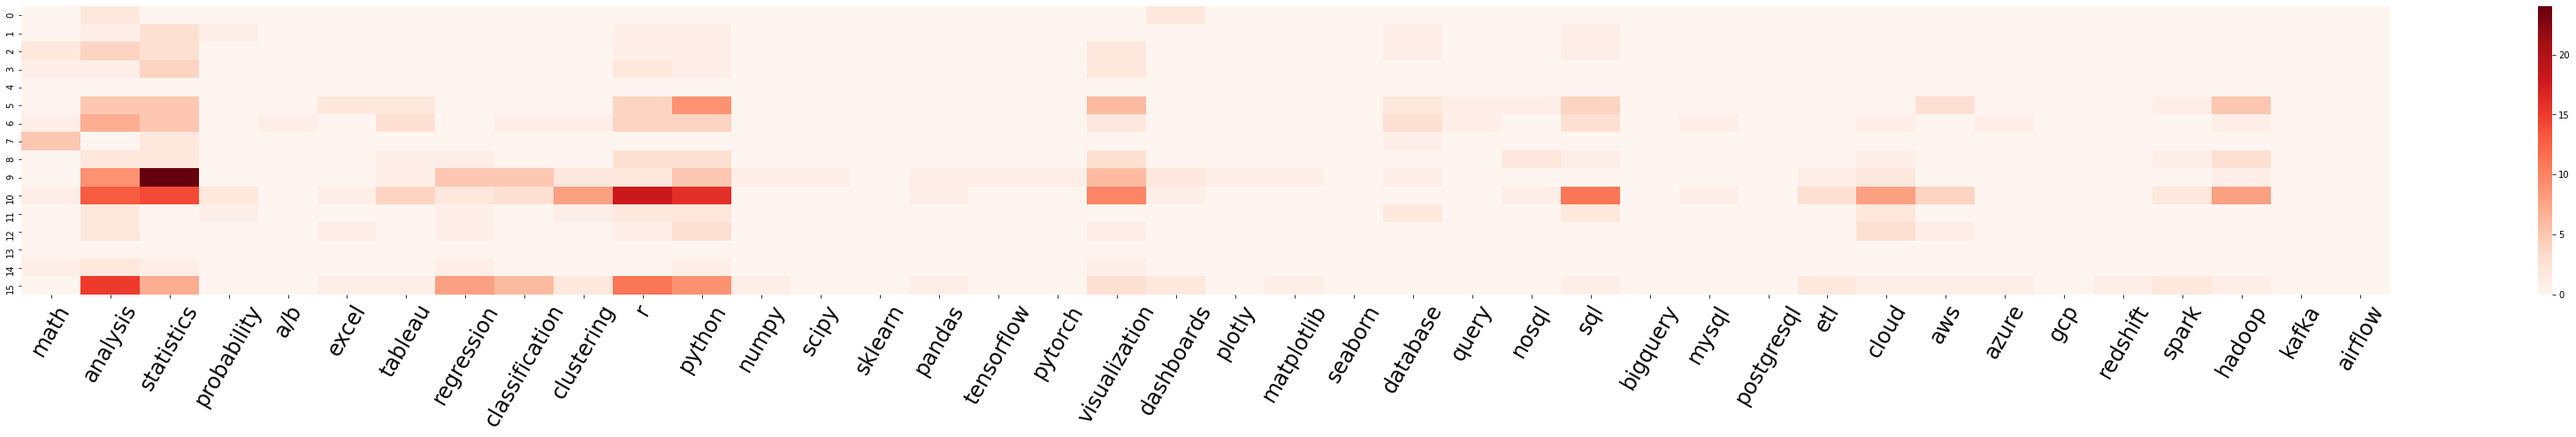

In [6]:
# data engineering articles heatmap checking for outliers
f, ax = plt.subplots(figsize=(60,6))
ax = sns.heatmap(df_datascience, cmap='Reds')
ax.set_xticklabels(df_datascience.columns, {'fontsize':24}, rotation=60);

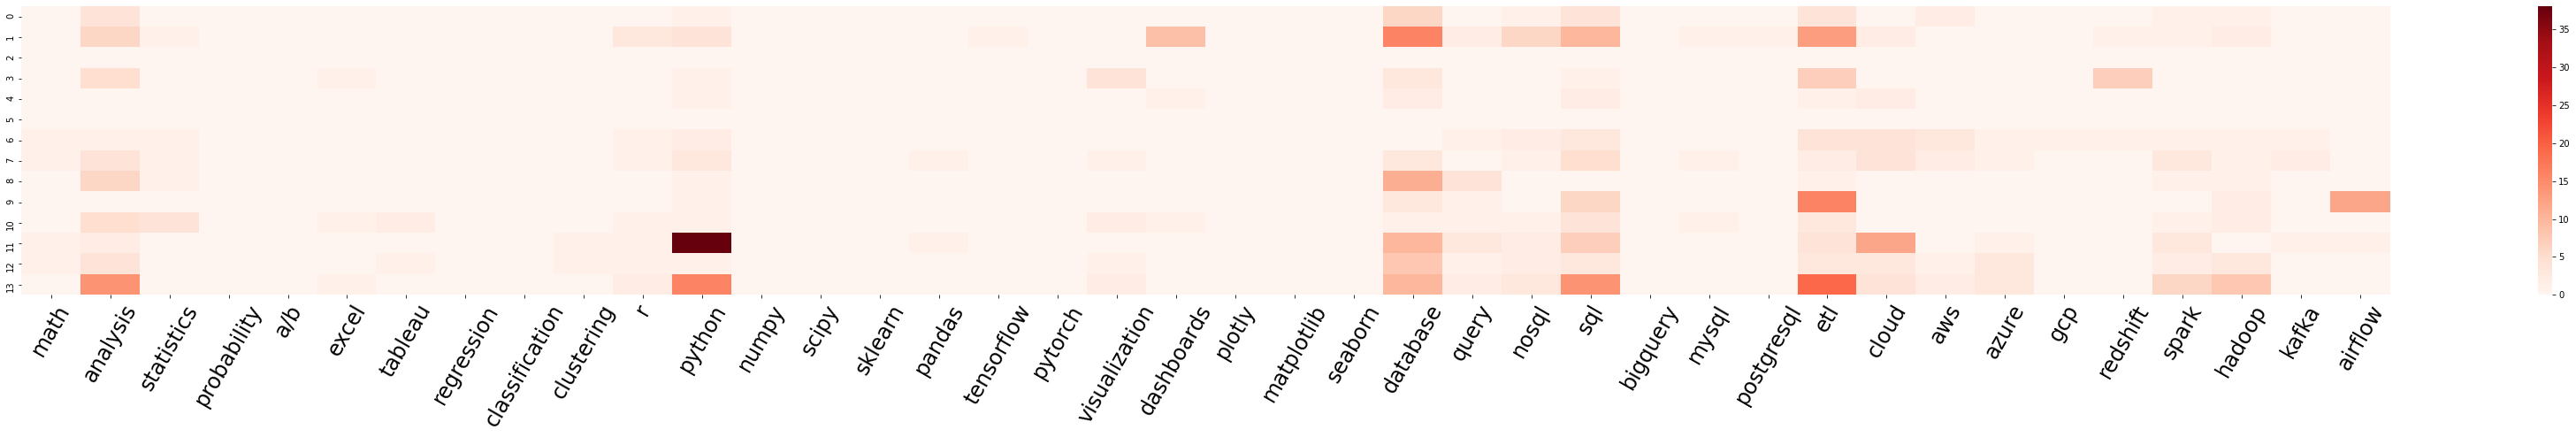

In [7]:
# data science articles heatmap, checking for outliers
f, ax = plt.subplots(figsize=(60,6))
ax = sns.heatmap(df_dataengineering, cmap='Reds')
ax.set_xticklabels(df_dataengineering.columns, {'fontsize':24}, rotation=60);


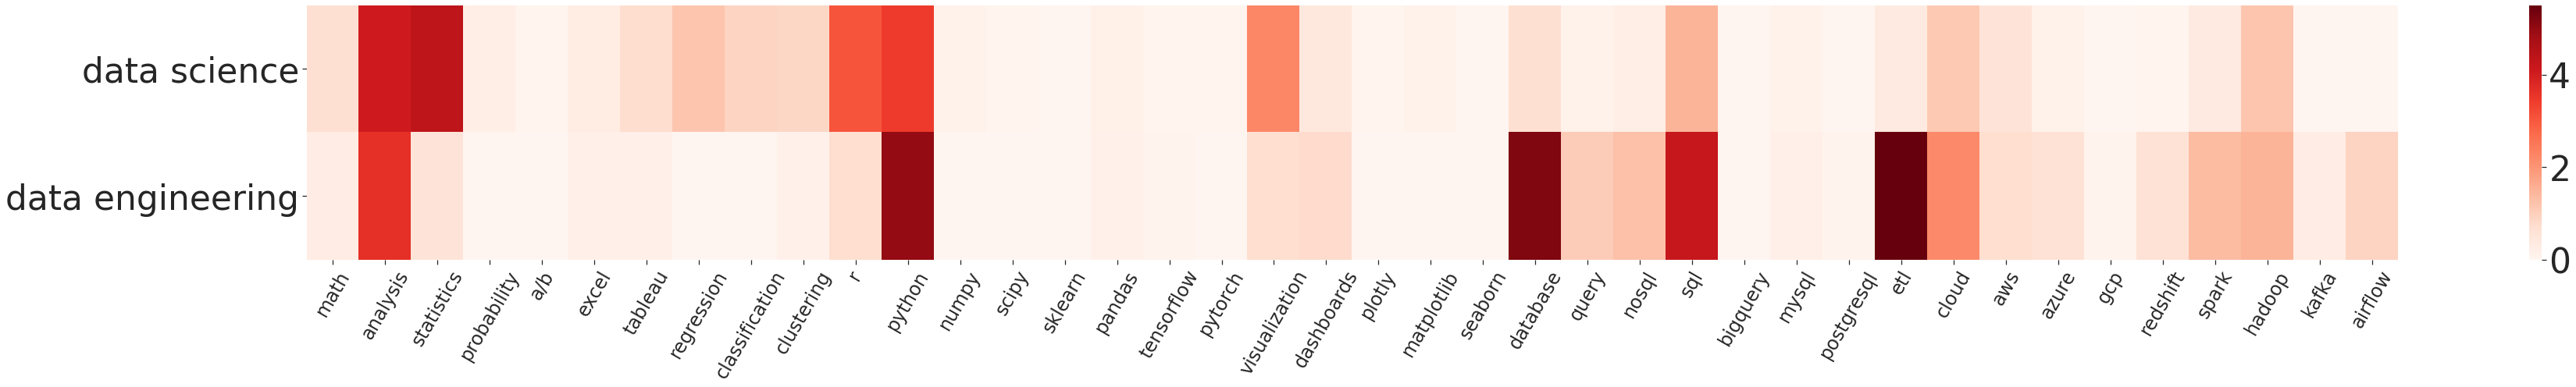

In [8]:
# concatenation of data science and data engineering articles
df_datascience_mean = pd.DataFrame(df_datascience.mean(axis=0)).transpose()
df_dataengineering_mean = pd.DataFrame(df_dataengineering.mean(axis=0)).transpose()
df_overview = pd.concat([df_datascience_mean, df_dataengineering_mean], axis=0)
df_overview.index = ['data science', 'data engineering']
sns.set(font_scale=4)
sns.set_style("ticks", {"xtick.major.size":48})
f, ax = plt.subplots(figsize=(60,6))
ax = sns.heatmap(df_overview, cmap = "Reds")
ax.set_xticklabels(df_overview.columns, {'fontsize':24}, rotation=60);

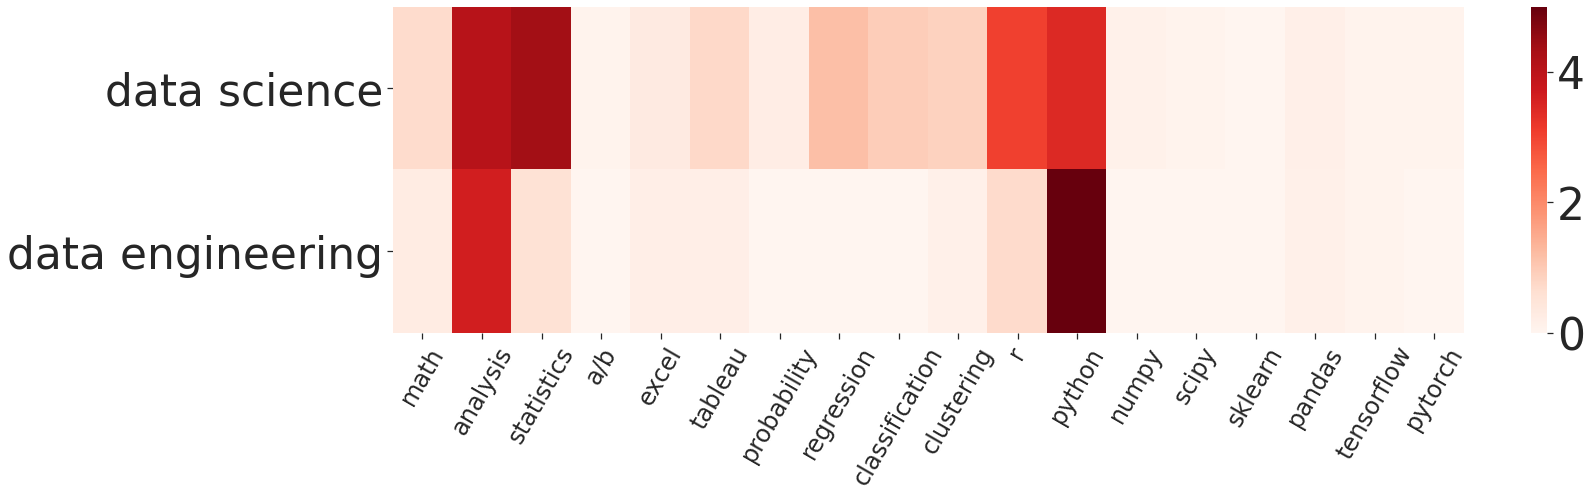

In [9]:
f, ax = plt.subplots(figsize=(24,6))
ax = sns.heatmap(df_overview[['math','analysis','statistics','a/b','excel','tableau','probability','regression','classification','clustering','r','python','numpy','scipy','sklearn','pandas','tensorflow','pytorch']], cmap = "Reds")
ax.set_xticklabels(['math','analysis','statistics','a/b','excel','tableau','probability','regression','classification','clustering','r','python','numpy','scipy','sklearn','pandas','tensorflow','pytorch'], {'fontsize':24}, rotation=60);

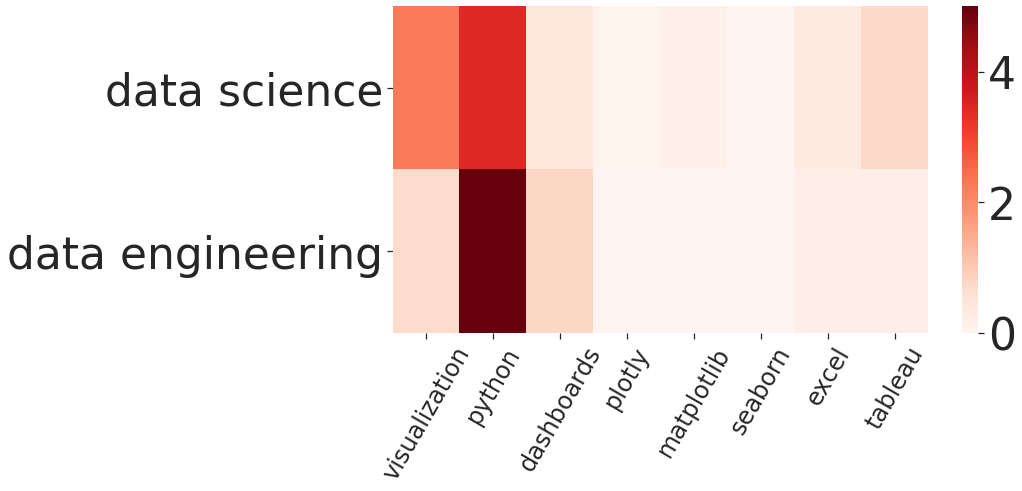

In [10]:
f, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(df_overview[['visualization','python','dashboards','plotly','matplotlib','seaborn','excel','tableau']], cmap = "Reds")
ax.set_xticklabels(['visualization','python','dashboards','plotly','matplotlib','seaborn','excel','tableau'], {'fontsize':24}, rotation=60);

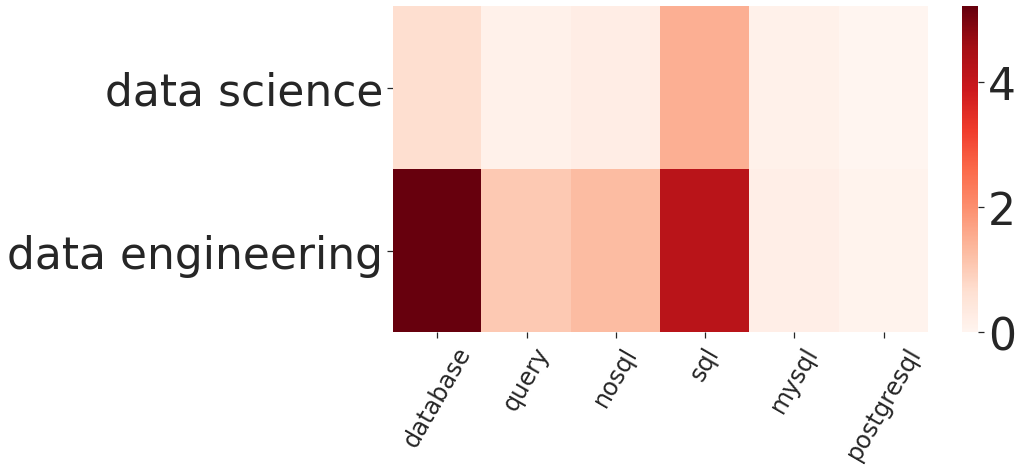

In [11]:
f, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(df_overview[['database','query','nosql','sql','mysql','postgresql']], cmap = "Reds")
ax.set_xticklabels(['database','query','nosql','sql','mysql','postgresql'], {'fontsize':24}, rotation=60);

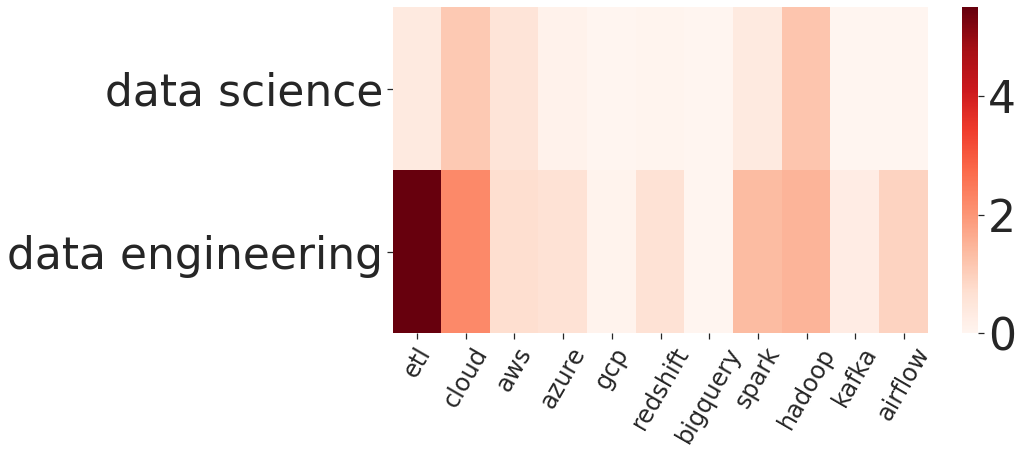

In [12]:
f, ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(df_overview[['etl','cloud','aws','azure','gcp','redshift','bigquery','spark','hadoop','kafka','airflow']], cmap = "Reds")
ax.set_xticklabels(['etl','cloud','aws','azure','gcp','redshift','bigquery','spark','hadoop','kafka','airflow'], {'fontsize':24}, rotation=60);